In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [2]:
cars = pd.read_csv("car_price_prediction.csv")
cars.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [3]:
cars.shape

(19237, 18)

In [4]:
cars.tail(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19228,45773726,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
cars.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
cars.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
cars.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
3275,45811208,31361,-,MERCEDES-BENZ,Sprinter 315CDI,2007,Microbus,No,Diesel,2.1 Turbo,268022 km,6.0,Manual,Front,02-Mar,Left wheel,White,0
15888,45788803,8151,-,TOYOTA,Vitz,2005,Hatchback,No,Petrol,1.3,190000 km,4.0,Automatic,Front,04-May,Right-hand drive,Silver,8
13813,45620823,627,1172,MERCEDES-BENZ,E 350,2011,Sedan,Yes,Diesel,3.5,134904 km,6.0,Automatic,4x4,04-May,Left wheel,Grey,12
8670,45801907,13495,531,HYUNDAI,Elantra,2012,Sedan,Yes,Petrol,1.6,119595 km,4.0,Automatic,Front,04-May,Left wheel,White,4
18870,45648011,706,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,115312 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12


In [9]:
cars.duplicated().sum()

313

In [10]:
cars.drop_duplicates(inplace = True)

In [11]:
cars.duplicated().sum()

0

In [12]:
cars.shape

(18924, 18)

# Data Analysis and Visualization

In [14]:
cars["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [15]:
for i in cars.columns:
    print(i, ":" , cars[i].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


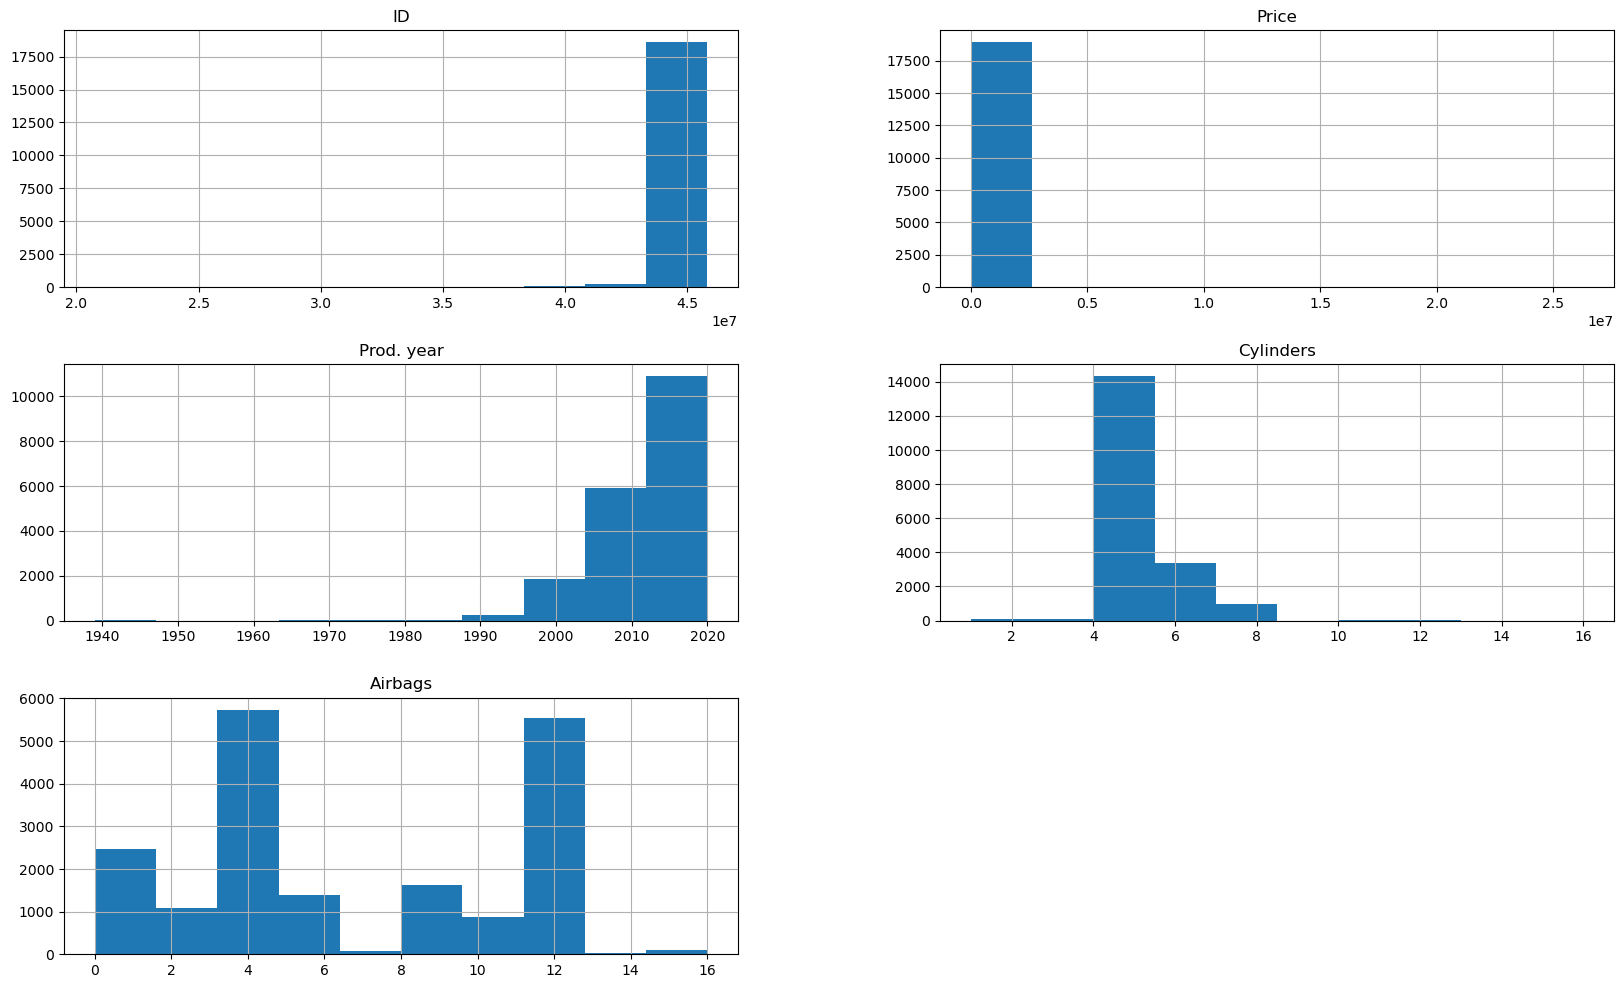

In [16]:
cars.hist(figsize=(20 ,12))
plt.show()

In [17]:
top_cars = cars["Manufacturer"].value_counts().head(10)
top_cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

In [18]:
cars["Manufacturer"].value_counts().sort_values(ascending =True).head(10)

Manufacturer
GREATWALL       1
LANCIA          1
HAVAL           1
LAMBORGHINI     1
ASTON MARTIN    1
PONTIAC         1
SATURN          1
TESLA           1
BENTLEY         2
ZAZ             2
Name: count, dtype: int64

<Axes: xlabel='Manufacturer'>

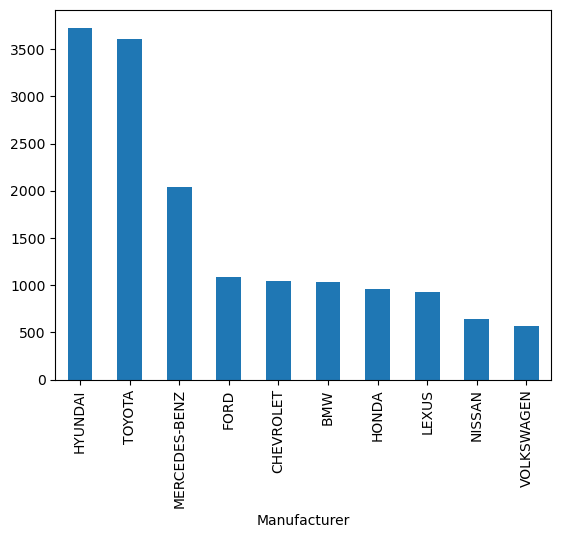

In [19]:
top_cars.plot(kind= 'bar')

<Axes: xlabel='Manufacturer'>

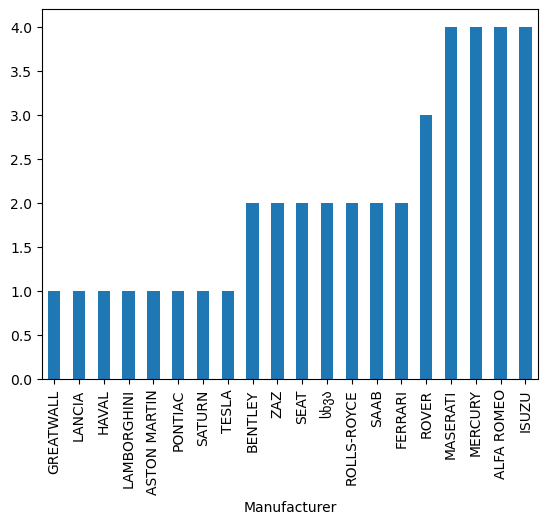

In [20]:
cars["Manufacturer"].value_counts().sort_values(ascending= True).head(20).plot(kind = 'bar')

In [21]:
# Find average values of top 10 cars
toppricemean=[cars[cars["Manufacturer"] == i]["Price"].mean() for i in list(top_cars.index)]

In [22]:
toppricemean

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

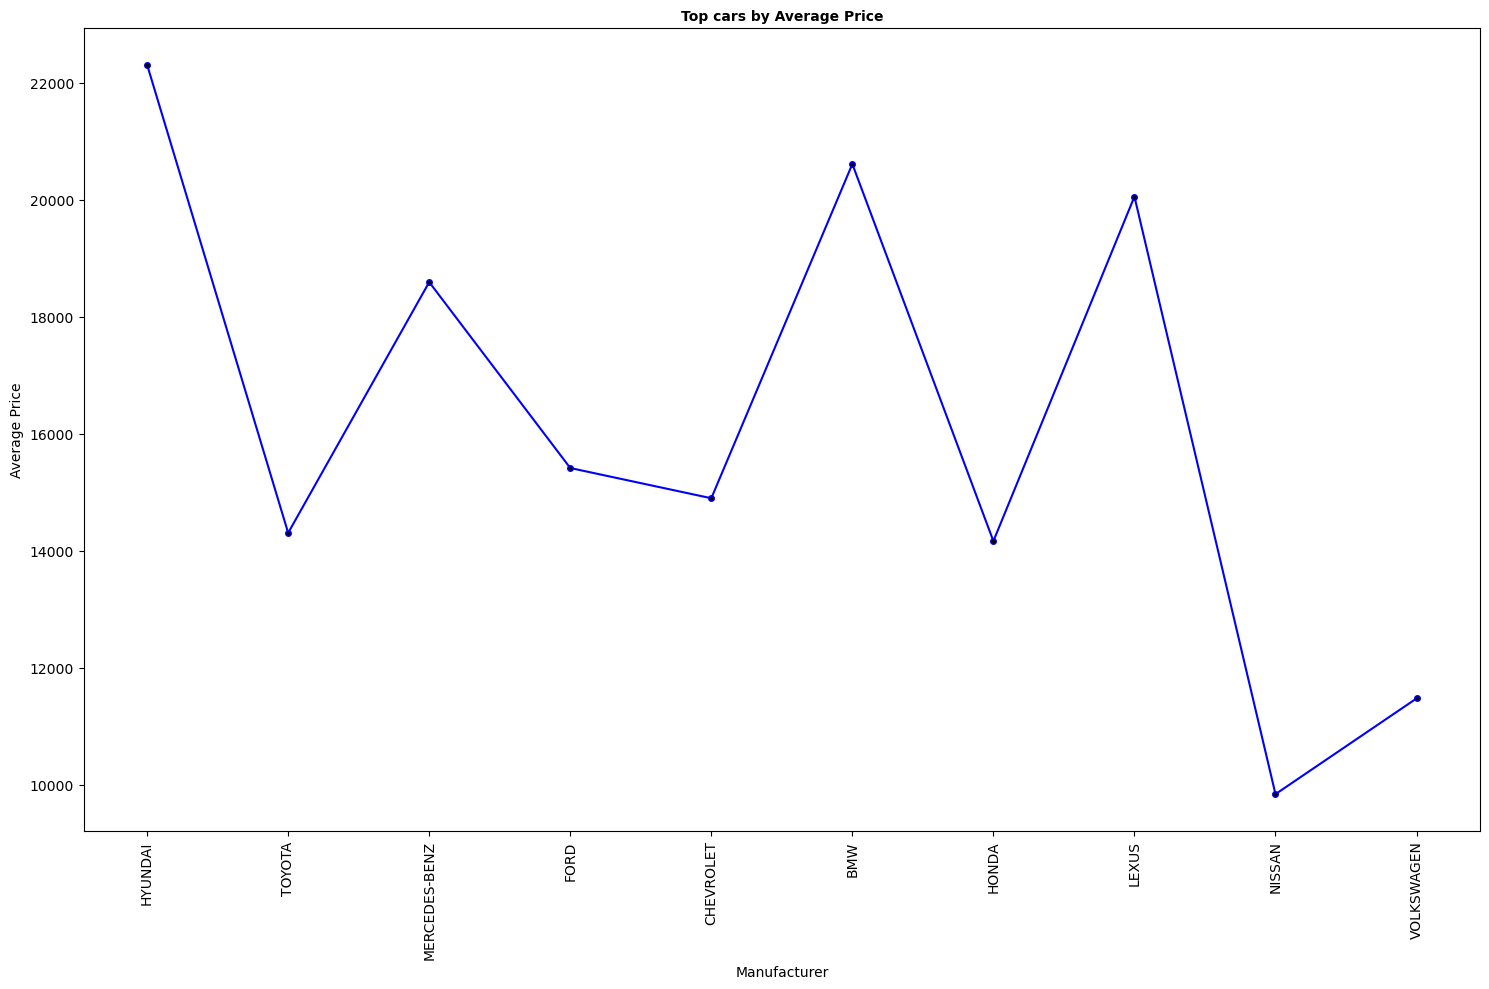

In [23]:
plt.figure(figsize = (15,10))
plt.plot(top_cars.index , toppricemean , marker = "o" , ms = 4 , markerfacecolor = "black" , color = "b")
plt.title("Top cars by Average Price" , fontweight = 'bold' , fontsize = 10)
plt.xlabel("Manufacturer")
plt.ylabel("Average Price")
plt.xticks(rotation =90)
plt.tight_layout()

plt.show()

In [24]:
ob = cars.select_dtypes(include ="object")

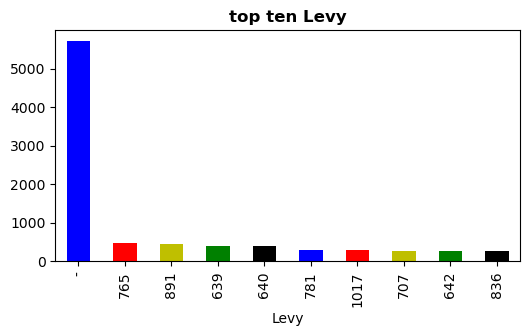

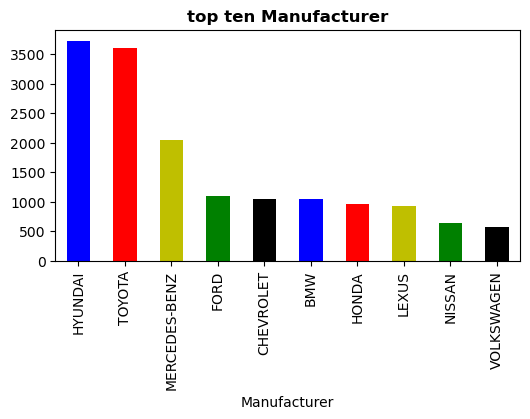

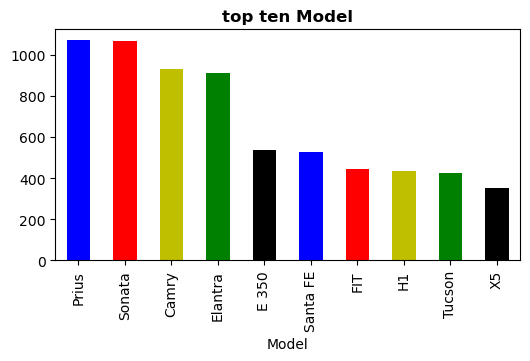

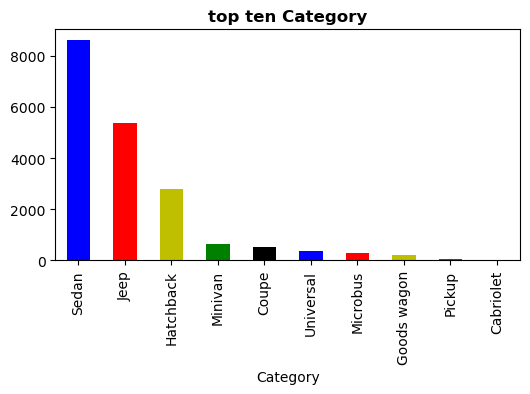

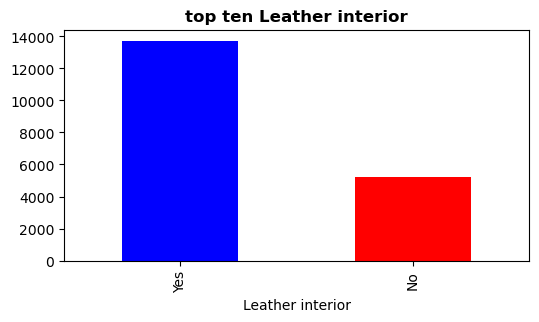

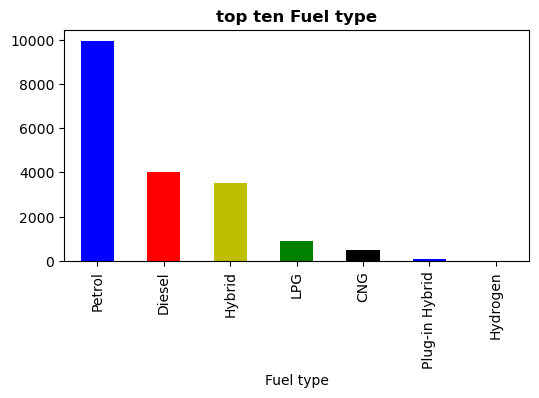

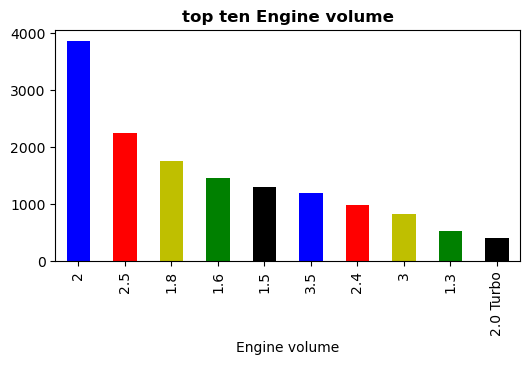

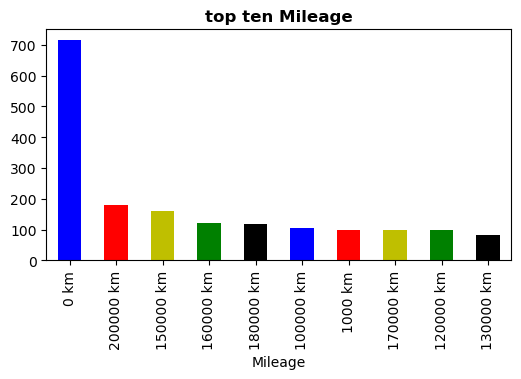

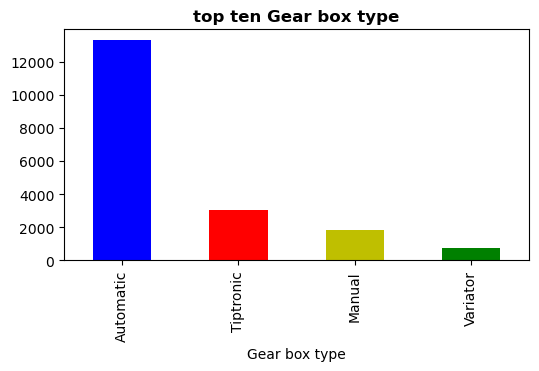

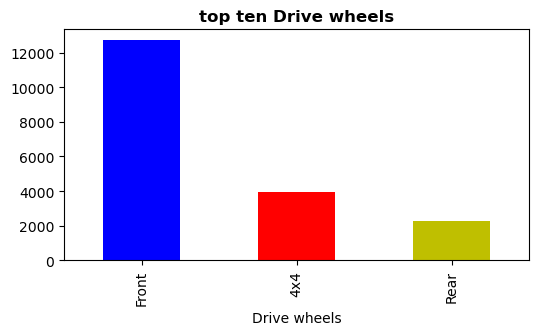

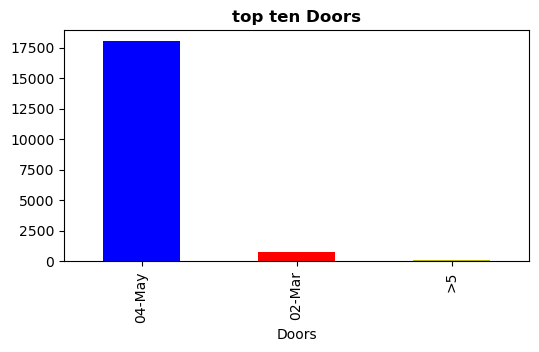

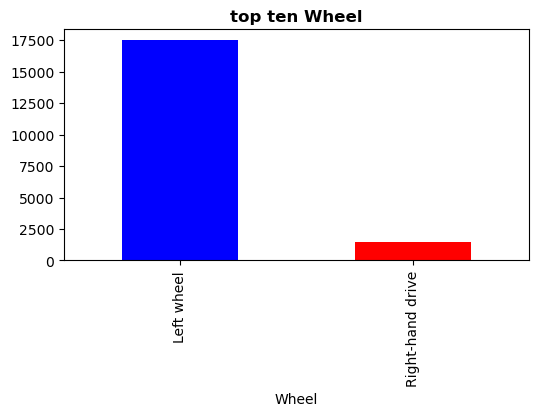

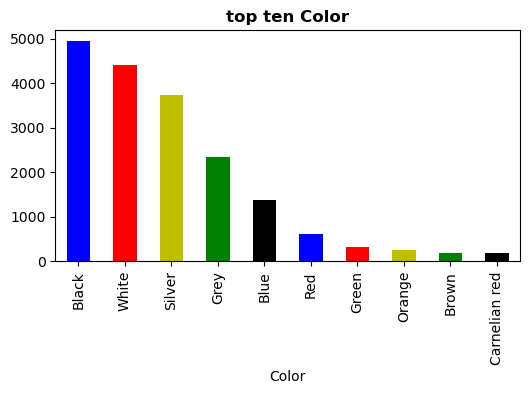

In [25]:
for i in ob:
    top = cars[i].value_counts()[:10]
    plt.figure(figsize=(6 ,3))
    color=["b" , "r" , "y" , "g" , "black"]
    top.plot(kind = "bar" , color = color)
    plt.title("top ten" + " " + i , fontweight = "bold")
    plt.tight_layout
plt.show()

# PREPROCESSING

In [27]:
import datetime
dtime = datetime.datetime.now()
dtime

datetime.datetime(2024, 9, 19, 13, 51, 43, 96853)

In [28]:
cars["Age"] = dtime.year-cars["Prod. year"]

In [29]:
cars.drop(["ID" ,"Doors"],axis = 1 , inplace = True)

In [30]:
cars["Levy"] = cars["Levy"].str.replace("-" ,"0")
cars["Levy"] = cars["Levy"].astype(float)

In [31]:
# cars["Engine volume"].unique()
cars["Engine volume"] = cars["Engine volume"].str.replace("Turbo" , "")
cars["Engine volume"] = cars["Engine volume"].astype(float)

In [32]:
# cars["Mileage"].unique()
cars["Mileage"] = cars["Mileage"].str.replace("km" , "")
cars["Mileage"] =cars["Mileage"].astype("int64")

In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
 16  Age               18924 non-null  int64  
dty

In [34]:
 cars.head(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


# OUTLIER

In [36]:
# After Remowing outliers
cars.shape

(18924, 17)

In [37]:
non_ob = cars.select_dtypes(exclude ="object")

In [38]:
for col in non_ob :
    Q2 = non_ob[col].quantile(0.25)
    Q3 = non_ob[col].quantile(0.75)

    IQR = Q3-Q2

    lower_bound = Q2-(1.2*IQR)
    upper_bound = Q3+(1.2*IQR)

    outliers = ((non_ob[col] < lower_bound) | (non_ob[col] > upper_bound)).sum()
    total_points = non_ob[col].shape[0]

    print(f"Total outlier in {col} : {outliers} -- {round(100*(outliers/total_points), 2)}%")
    

Total outlier in Price : 1545 -- 8.16%
Total outlier in Levy : 256 -- 1.35%
Total outlier in Prod. year : 1492 -- 7.88%
Total outlier in Engine volume : 2595 -- 13.71%
Total outlier in Mileage : 870 -- 4.6%
Total outlier in Cylinders : 4765 -- 25.18%
Total outlier in Airbags : 0 -- 0.0%
Total outlier in Age : 1492 -- 7.88%


In [39]:
if outliers > 0:
    cars = cars.loc[(cars[col] <= upper_bound) & (cars[col]>= lower_bound)]

In [40]:
#  Before Remowing outliers
cars.shape

(17432, 17)

# Transform Data

In [42]:
ob = cars.select_dtypes(include = object)
non_ob = cars.select_dtypes(exclude = object)

In [43]:
non_ob

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,13328,1399.0,2010,3.5,186005,6.0,12,14
1,16621,1018.0,2011,3.0,192000,6.0,8,13
2,8467,0.0,2006,1.3,200000,4.0,2,18
3,3607,862.0,2011,2.5,168966,4.0,0,13
4,11726,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...
19231,5802,1055.0,2013,3.5,107800,6.0,12,11
19233,15681,831.0,2011,2.4,161600,4.0,8,13
19234,26108,836.0,2010,2.0,116365,4.0,4,14
19235,5331,1288.0,2007,2.0,51258,4.0,4,17


In [44]:
ob

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...
19231,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,Automatic,Rear,Left wheel,Grey
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,Left wheel,Black


In [45]:
la = LabelEncoder()

In [46]:
for i in range(0 , ob.shape[1]):
    ob.iloc[: , i] = la.fit_transform(ob.iloc[: , i])

In [47]:
ob.head(5)

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,31,1074,4,1,2,0,0,0,12
1,8,540,4,0,5,2,0,0,1
2,21,563,3,0,5,3,1,1,1
3,16,543,4,1,2,0,0,0,14
4,21,563,3,1,5,0,1,0,12


In [48]:
ob = ob.astype(int)

In [49]:
ob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17432 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Manufacturer      17432 non-null  int32
 1   Model             17432 non-null  int32
 2   Category          17432 non-null  int32
 3   Leather interior  17432 non-null  int32
 4   Fuel type         17432 non-null  int32
 5   Gear box type     17432 non-null  int32
 6   Drive wheels      17432 non-null  int32
 7   Wheel             17432 non-null  int32
 8   Color             17432 non-null  int32
dtypes: int32(9)
memory usage: 749.0 KB


In [50]:
cars = pd.concat([ob , non_ob] , axis =1)

In [51]:
cars.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,31,1074,4,1,2,0,0,0,12,13328,1399.0,2010,3.5,186005,6.0,12,14
1,8,540,4,0,5,2,0,0,1,16621,1018.0,2011,3.0,192000,6.0,8,13
2,21,563,3,0,5,3,1,1,1,8467,0.0,2006,1.3,200000,4.0,2,18
3,16,543,4,1,2,0,0,0,14,3607,862.0,2011,2.5,168966,4.0,0,13
4,21,563,3,1,5,0,1,0,12,11726,446.0,2014,1.3,91901,4.0,4,10


In [52]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17432 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      17432 non-null  int32  
 1   Model             17432 non-null  int32  
 2   Category          17432 non-null  int32  
 3   Leather interior  17432 non-null  int32  
 4   Fuel type         17432 non-null  int32  
 5   Gear box type     17432 non-null  int32  
 6   Drive wheels      17432 non-null  int32  
 7   Wheel             17432 non-null  int32  
 8   Color             17432 non-null  int32  
 9   Price             17432 non-null  int64  
 10  Levy              17432 non-null  float64
 11  Prod. year        17432 non-null  int64  
 12  Engine volume     17432 non-null  float64
 13  Mileage           17432 non-null  int64  
 14  Cylinders         17432 non-null  float64
 15  Airbags           17432 non-null  int64  
 16  Age               17432 non-null  int64  
dty

In [53]:
cars = cars.reset_index(drop=True)

In [54]:
cars

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,31,1074,4,1,2,0,0,0,12,13328,1399.0,2010,3.5,186005,6.0,12,14
1,8,540,4,0,5,2,0,0,1,16621,1018.0,2011,3.0,192000,6.0,8,13
2,21,563,3,0,5,3,1,1,1,8467,0.0,2006,1.3,200000,4.0,2,18
3,16,543,4,1,2,0,0,0,14,3607,862.0,2011,2.5,168966,4.0,0,13
4,21,563,3,1,5,0,1,0,12,11726,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,35,485,9,1,1,0,2,0,7,5802,1055.0,2013,3.5,107800,6.0,12,11
17428,23,1145,9,1,5,2,1,0,11,15681,831.0,2011,2.4,161600,4.0,8,13
17429,23,1240,4,1,1,0,1,0,7,26108,836.0,2010,2.0,116365,4.0,4,14
17430,8,360,4,1,1,0,1,0,1,5331,1288.0,2007,2.0,51258,4.0,4,17


# Build Model

In [56]:
x = cars.drop(["Price"] , axis = 1)
y = cars["Price"]

In [57]:
x

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,31,1074,4,1,2,0,0,0,12,1399.0,2010,3.5,186005,6.0,12,14
1,8,540,4,0,5,2,0,0,1,1018.0,2011,3.0,192000,6.0,8,13
2,21,563,3,0,5,3,1,1,1,0.0,2006,1.3,200000,4.0,2,18
3,16,543,4,1,2,0,0,0,14,862.0,2011,2.5,168966,4.0,0,13
4,21,563,3,1,5,0,1,0,12,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,35,485,9,1,1,0,2,0,7,1055.0,2013,3.5,107800,6.0,12,11
17428,23,1145,9,1,5,2,1,0,11,831.0,2011,2.4,161600,4.0,8,13
17429,23,1240,4,1,1,0,1,0,7,836.0,2010,2.0,116365,4.0,4,14
17430,8,360,4,1,1,0,1,0,1,1288.0,2007,2.0,51258,4.0,4,17


In [58]:
y

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
17427     5802
17428    15681
17429    26108
17430     5331
17431      470
Name: Price, Length: 17432, dtype: int64

In [59]:
x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)

In [60]:
print(x_train.shape ,x_test.shape , y_train.shape , y_test.shape)

(13074, 16) (4358, 16) (13074,) (4358,)


In [61]:
model_LR = LinearRegression()
model_RF = RandomForestRegressor()
model_SVR = SVR()
model_DT = DecisionTreeRegressor()
model_GBOOSTING = GradientBoostingRegressor()

In [62]:
algo = ["LinearRegression" , "RandomForest" , "DecissionTree","SVR" ,"GradienBOOdting"]
R2_Score =[]
MSE = []
MAE = []

In [63]:
def predict(model):
    model.fit(x_train , y_train)
    prediction = model.predict(x_test)
    score =r2_score(prediction ,y_test)
    R2_Score.append(score)
    print(f"The Score of model is : {score}")
    mse = mean_squared_error(prediction ,y_test)
    MSE.append(mse)
    print(f"the mse of model is : {mse}")
    mae = mean_absolute_error(prediction , y_test)
    MAE.append(mae)
    print(f"The mae of model is : {mae}" )

In [64]:
predict(model_LR)
predict(model_RF)
predict(model_DT)
predict(model_SVR)
predict(model_GBOOSTING)

The Score of model is : -3.761002154992962
the mse of model is : 403992845.2285012
The mae of model is : 11170.131503642579
The Score of model is : 0.21029808797584637
the mse of model is : 200304485.7208868
The mae of model is : 4709.439622725662
The Score of model is : 0.08481676830337459
the mse of model is : 392174058.8812159
The mae of model is : 6048.62819666884
The Score of model is : -7001824735.633427
the mse of model is : 500049740.0550171
The mae of model is : 12079.723194015045
The Score of model is : -0.7328887591238624
the mse of model is : 267802852.67761123
The mae of model is : 7282.214255653597


In [65]:
pd.DataFrame({"Algo" : algo ,"R2_Score" : R2_Score ,"Mean_Squared_Error" : MSE , "Mean_Absolute_Error":MAE})

,Algo,R2_Score,Mean_Squared_Error,Mean_Absolute_Error
0,LinearRegression,-3.761002e+00,4.039928e+08,11170.131504
1,RandomForest,2.102981e-01,2.003045e+08,4709.439623
2,DecissionTree,8.481677e-02,3.921741e+08,6048.628197
3,SVR,-7.001825e+09,5.000497e+08,12079.723194
4,GradienBOOdting,-7.328888e-01,2.678029e+08,7282.214256
